## Model Development Overview

- The target variable is `Trip_Price`
- Rows with missing target values will be removed, as decided during the EDA

## Regression Models

Since this is a regression problem, the following models will be evaluated:
1. Linear Regression
2. KNN Regression
3. Random Forest Regression

The models will be compared using the following evaluation metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

The model with the best overall performance will be selected for the final prediction task.

   

## Let's start with the cleaning part of the row that has nan valors.
I will use the function clean_data defined in the data_processing.py in the backend folder

In [27]:
from taxipred.backend.data_processing import load_csv, clean_data 
df = load_csv("taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [28]:
df_clean = clean_data(df)

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


In [30]:
df_clean.shape, df.shape

((562, 11), (1000, 11))

## Categorical Feature Encoding

The dataset contains several categorical features such as `Time_of_Day`, `Day_of_Week`, `Traffic_Conditions`, and `Weather`.
Since regression models require numerical inputs, these features are encoded using one-hot encoding (`get_dummies`).

This allows the model to use all available information without introducing artificial numerical ordering.

In [31]:
import pandas as pd 

df_encoded = pd.get_dummies(df_clean, drop_first=True)

df_encoded.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,False,True,False,False,True,False,False,False
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,True,False,False,True,False,False,False,False
5,8.64,2.0,2.55,1.71,0.48,89.33,60.2028,False,False,False,True,False,True,False,False
12,41.79,3.0,4.60,1.77,0.11,86.95,88.1328,False,False,True,True,False,False,False,False
14,9.91,2.0,2.32,1.26,0.34,41.72,28.9914,True,False,False,False,False,False,False,False


In [32]:
df_encoded.shape


(562, 15)

In [33]:
df_encoded.isnull().sum().sum()


np.int64(0)

In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           562 non-null    float64
 1   Passenger_Count            562 non-null    float64
 2   Base_Fare                  562 non-null    float64
 3   Per_Km_Rate                562 non-null    float64
 4   Per_Minute_Rate            562 non-null    float64
 5   Trip_Duration_Minutes      562 non-null    float64
 6   Trip_Price                 562 non-null    float64
 7   Time_of_Day_Evening        562 non-null    bool   
 8   Time_of_Day_Morning        562 non-null    bool   
 9   Time_of_Day_Night          562 non-null    bool   
 10  Day_of_Week_Weekend        562 non-null    bool   
 11  Traffic_Conditions_Low     562 non-null    bool   
 12  Traffic_Conditions_Medium  562 non-null    bool   
 13  Weather_Rain               562 non-null    bool   
 14 

## Split
The dataset is split into training and test sets (80/20) to evaluate model performance on unseen data.


In [35]:
X = df_encoded.drop(columns=["Trip_Price"])
y = df_encoded["Trip_Price"]


## Train / Test split 

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state= 42
)
X_train.shape, X_test.shape

((449, 14), (113, 14))

## Now we can start the real model development with the same data for all the models

### Model: Linear Regression


In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

print(f"Parameters: {lin_reg.coef_}")
print(f"Intercept parameter: {lin_reg.intercept_}")

Parameters: [ 1.7473637  -0.38362902 -0.50938979 25.34405718 60.67285456  0.29936423
 -1.94039299  2.06511074 -0.67438288  1.81845669 -4.44546331 -4.33718321
 -1.40973211  1.21214312]
Intercept parameter: -52.09238969012227


In [38]:
y_pred_lr = lin_reg.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_lr = mean_absolute_error(y_test , y_pred_lr) 
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

mae_lr, mse_lr, rmse_lr

(9.485349730081861, 289.9922871891947, np.float64(17.029159908497974))

The MAE (9.48) and RMSE (17.02) show a relatively large gap between them.
This suggests that larger errors have a significant impact on the model evaluation.

As already observed in the EDA, the relationship between features and the target variable may not be purely linear.
Therefore, Linear Regression may not be the most suitable model for this dataset.

Let's move on with other regression models, and the final model will be selected based on their overall performance for the application.


### Model: KNN


For perform the knn we have to scale our data, knn is a model that evaluate the similarity of data and if the valor are not scaled the metod will consider the larger number more important.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train) # fit only train data
X_test_scaled = scaler.fit_transform(X_test)


Now we can proced with KNN 

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5) # n_neighbors=5 ->will consider the 5 treep more similar and preform the avarage 
knn_reg.fit(X_train_scaled, y_train)

y_pred_knn = knn_reg.predict(X_test_scaled)

In [43]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

mae_knn, mse_knn, rmse_knn


(16.723369167583474, 958.7952545308307, np.float64(30.96441916992519))

## KNN Regression Results

Despite applying feature scaling, KNN Regression shows higher error values compared to Linear Regression.
We will proceed with Random Forest Regression to evaluate whether it provides better performance.


## Random Forest Regression

Random Forest Regression is evaluated as a more flexible model.


In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=100,       # standard number of tree
    random_state=42         # same data

)

In [45]:
rf_reg.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [46]:
y_pred_rf = rf_reg.predict(X_test)

In [47]:
mae_rf = mean_absolute_error(y_test , y_pred_rf)
mse_rf = mean_squared_error(y_test , y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

mae_rf, mse_rf, rmse_rf

(5.433076626285615, 105.98277397193698, np.float64(10.29479353712045))

## Random Forest Regression Results

Random Forest Regression shows improved performance compared to previous models

## Let's analize the results of all 3 models

In [48]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "KNN Regression",
        "Random Forest Regression"
    ],
    "RMSE": [
        rmse_lr,
        rmse_knn,
        rmse_rf
    ]
})

results_df


,Model,RMSE
0,Linear Regression,17.029160
1,KNN Regression,30.964419
2,Random Forest Regression,10.294794


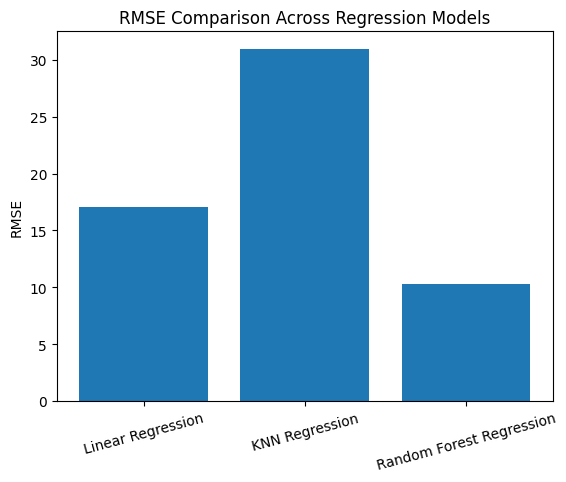

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results_df["Model"], results_df["RMSE"])
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Regression Models")
plt.xticks(rotation=15)
plt.show()


## Model Comparison

The bar chart shows a clear comparison of RMSE values across the models.
Random Forest Regression achieves the lowest RMSE, indicating superior predictive performance.
I will select Random Forest Regression as the final model.


## Final Model Training and Export

At this stage, the goal is no longer model evaluation but model deployment.

For this reason, the random forest model is retrained using the entire dataset to leverage all available information.

We will create a `joblib` file and saved for later use in the backend application.


In [50]:
final_rf_model = RandomForestRegressor(
n_estimators=100,
random_state=42

)

final_rf_model.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

# Test clean data over 150 Trip_Price
## Target-Based Outlier Filtering
From the EDA, it is clear that the target variable `Trip_Price` contains some very high values compared to the rest of the data.
These values are far from the main distribution and may affect model performance.

For this reason, the model is trained using only observations with `Trip_Price` below 150.
The Random Forest model is retrained on this filtered dataset to check whether the prediction error is reduced.


In [52]:
df_filtered = df_clean[df_clean["Trip_Price"] < 150].copy()
df_filtered.shape 

(548, 11)

New encoding on new data and train model 


In [53]:
from sklearn.model_selection import train_test_split


df_filtered_encoded = pd.get_dummies(df_filtered, drop_first=True)

X_f = df_filtered_encoded.drop(columns=["Trip_Price"])
y_f = df_filtered_encoded["Trip_Price"]

# train model with new data

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_f, y_f, test_size=0.2, random_state=42
)



Random Forest on new data 


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf_filtered = RandomForestRegressor(n_estimators=100, random_state=42)
rf_filtered.fit(X_train_f, y_train_f)

y_pred_f = rf_filtered.predict(X_test_f)

mae_f = mean_absolute_error(y_test_f, y_pred_f)
mse_f = mean_squared_error(y_test_f, y_pred_f)
rmse_f = np.sqrt(mse_f)

mae_f, mse_f, rmse_f

(3.5808216545454523, 22.03116704329122, np.float64(4.693737001930468))

The RMSE is lower than before.
This indicates that the model performs better after removing extreme values.


In [55]:
comparison_df = pd.DataFrame({
    "Dataset" : ["Original", "Filtered (Trip_Price < 150)"],
    "MAE" : [mae_rf, mae_f],
    "RMSE" : [rmse_rf, rmse_f]
})
comparison_df



,Dataset,MAE,RMSE
0,Original,5.433077,10.294794
1,Filtered (Trip_Price < 150),3.580822,4.693737


Create a joblib file 

In [57]:
import joblib

joblib.dump(final_rf_model, "random_forest_model.joblib")

['random_forest_model.joblib']

## Model Development Completed

The model development phase has been completed.
The final Random Forest Regression model was trained using the entire dataset and exported as a `joblib` file.
